In [70]:
import pandas as pd
from sklearn.model_selection import train_test_split

data = pd.read_json(path_or_buf="datasets/all.jsonl", lines=True)
train, test = train_test_split(data, test_size=0.2, random_state=57)

In [62]:
import os

def create_set(data):
    X, y = [], []
    for i in range(len(data)):
        example = data.iloc[i]
        text = example.text
        for label in example.label:
            if "WT" in label[2] and "WTO" not in label[2]:
                X.append(text)
                y.append(label[2])
    return X, y 

X_train, y_train = create_set(train)
X_test, y_test = create_set(test)

In [63]:
import nltk
nltk.download('stopwords')
import pickle
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/aschern/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [105]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidfconverter = TfidfVectorizer(max_features=1500, min_df=5, max_df=0.7, stop_words=stopwords.words('russian'))
X_train_v = tfidfconverter.fit_transform(X_train).toarray()
X_test_v = tfidfconverter.transform(X_test).toarray()

In [106]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score

def get_scores(X, y):
    preds = classifier.predict(X)
    print(f1_score(y, preds, average='macro'))
    print(f1_score(y, preds, average='micro'))
    print(accuracy_score(y, preds))
    

classifier = RandomForestClassifier(n_estimators=10, max_depth=10, random_state=0, class_weight = "balanced")
classifier.fit(X_train_v, y_train)
get_scores(X_train_v, y_train)
print("Test")
get_scores(X_test_v, y_test)
list(zip(classifier.predict(X_test_v), y_test))

0.9628406275805119
0.99
0.99
Test
0.4
0.88
0.88


[('(WT) Opinion', '(WT) Opinion'),
 ('(WT) Opinion', '(WT) Opinion'),
 ('(WT) Opinion', '(WT) Opinion'),
 ('(WT) Opinion', '(WT) Opinion'),
 ('(WT) Reporting', '(WT) Reporting'),
 ('(WT) Opinion', '(WT) Reporting'),
 ('(WT) Opinion', '(WT) Opinion'),
 ('(WT) Opinion', '(WT) Opinion'),
 ('(WT) Opinion', '(WT) Opinion'),
 ('(WT) Opinion', '(WT) Opinion'),
 ('(WT) Opinion', '(WT) Opinion'),
 ('(WT) Opinion', '(WT) Opinion'),
 ('(WT) Opinion', '(WT) Opinion'),
 ('(WT) Opinion', '(WT) Opinion'),
 ('(WT) Opinion', '(WT) Other'),
 ('(WT) Opinion', '(WT) Opinion'),
 ('(WT) Opinion', '(WT) Opinion'),
 ('(WT) Opinion', '(WT) Opinion'),
 ('(WT) Opinion', '(WT) Satire'),
 ('(WT) Opinion', '(WT) Opinion'),
 ('(WT) Opinion', '(WT) Opinion'),
 ('(WT) Opinion', '(WT) Opinion'),
 ('(WT) Opinion', '(WT) Opinion'),
 ('(WT) Opinion', '(WT) Opinion'),
 ('(WT) Opinion', '(WT) Opinion')]

## Keras

tensorflow 1.15.2

In [50]:
from tensorflow.keras import layers
from tensorflow import keras
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [51]:
import pandas as pd
from sklearn.model_selection import train_test_split

data = pd.read_json(path_or_buf="datasets/all.jsonl", lines=True)
data["label"] = data["label"].apply(lambda x: [el[2] for el in x if "WT" in el[2]])
train, test = train_test_split(data, test_size=0.2, random_state=57)
train

,id,text,Comments,label
3,30,От вакцинации от коронавируса к чипированию //...,[],"[(WT) Opinion, (WTO) Irrelevant data / uncheck..."
45,72,Так откуда взялся коронавирус? Учёные пришли к...,"[сообщение оборвано, хотя в целом, думаю, его ...","[(WT) Reporting, (WTO) Irrelevant data / unche..."
49,76,6 магических способов защиты от коронавируса /...,[],"[(WT) Satire, (WTO) Mocking, trolling, (WTO) M..."
113,15,Смертельный коронавирус был создан искусственн...,[],"[(WT) Opinion, (WTO) Irrelevant data / uncheck..."
43,70,Коронавирус - это заговор стран // Яндекс. Дзе...,[],"[(WT) Opinion, (WTO) Storytelling]"
...,...,...,...,...
124,27,Почему вредно носить маску? // Яндекс. Дзен; П...,[],"[(WT) Opinion, (WTO) Emotional ""load"", (WTO) I..."
22,49,Наталья Бублик (2020). КОРОНАВИРУС сильно НАПУ...,[],"[(WT) Opinion, (WTO) Irrelevant data / uncheck..."
5,32,Источник: канал на Яндекс.Дзене “Андрейкин” ()...,[],"[(WT) Opinion, (WTO) Irrelevant data / uncheck..."
86,114,"Так ли страшен ковид, как его пиарят // Яндекс...",[],"[(WTO) Irrelevant data / uncheckable data, (WT..."


In [52]:
from collections import Counter
Counter(np.concatenate(train.label.values))

Counter({'(WT) Opinion': 86,
         '(WTO) Irrelevant data / uncheckable data': 105,
         '(WTO) Shock content': 30,
         '(WT) Reporting': 7,
         '(WTO) Promotion': 32,
         '(WT) Satire': 3,
         '(WTO) Mocking, trolling': 21,
         '(WTO) Obfuscation': 19,
         '(WTO) Emotional "load"': 43,
         '(WTO) Storytelling': 41,
         '(WTO) Slogans, myths, stereotypes': 45,
         '(WTO) Oversimplification': 8,
         '(WTO) Repetition': 10,
         '(WTO) Allegories and metaphors': 17,
         '(WTO) Extremums': 10,
         '(WT) Other': 4})

Multilabel на все

In [53]:
test_split = 0.1

# Initial train and test split.
train_df, val_df = train_test_split(
    train,
    test_size=test_split,
    # stratify=train["label"].values, # для imbalanve,
    random_state=42    
)
test_df = test

print(f"Number of rows in training set: {len(train_df)}")
print(f"Number of rows in validation set: {len(val_df)}")
print(f"Number of rows in test set: {len(test_df)}")

Number of rows in training set: 90
Number of rows in validation set: 10
Number of rows in test set: 25


In [54]:
labels = tf.ragged.constant(train_df["label"].values)
lookup = tf.keras.layers.StringLookup(output_mode="multi_hot")
lookup.adapt(labels)
vocab = lookup.get_vocabulary()


def invert_multi_hot(encoded_labels):
    """Reverse a single multi-hot encoded label to a tuple of vocab terms."""
    hot_indices = np.argwhere(encoded_labels == 1.0)[..., 0]
    return np.take(vocab, hot_indices)

print("Vocabulary:\n")
print(vocab)

Vocabulary:

['[UNK]', '(WTO) Irrelevant data / uncheckable data', '(WT) Opinion', '(WTO) Slogans, myths, stereotypes', '(WTO) Emotional "load"', '(WTO) Storytelling', '(WTO) Promotion', '(WTO) Shock content', '(WTO) Mocking, trolling', '(WTO) Obfuscation', '(WTO) Allegories and metaphors', '(WTO) Repetition', '(WTO) Extremums', '(WTO) Oversimplification', '(WT) Reporting', '(WT) Other', '(WT) Satire']


2023-05-08 16:49:39.627581: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype variant and shape [90]
	 [[{{node Placeholder/_0}}]]


In [55]:
batch_size = 4
auto = tf.data.AUTOTUNE


def make_dataset(dataframe, is_train=True):
    labels = tf.ragged.constant(dataframe["label"].values)
    label_binarized = lookup(labels).numpy()
    dataset = tf.data.Dataset.from_tensor_slices(
        (dataframe["text"].values, label_binarized)
    )
    dataset = dataset.shuffle(batch_size * 10) if is_train else dataset
    return dataset.batch(batch_size)

In [56]:
train_dataset = make_dataset(train_df, is_train=True)
validation_dataset = make_dataset(val_df, is_train=False)
test_dataset = make_dataset(test_df, is_train=False)

In [57]:
text_batch, label_batch = next(iter(train_dataset))

for i, text in enumerate(text_batch[:1]):
    label = label_batch[i].numpy()[None, ...]
    print(f"Text: {text}")
    print(f"Label(s): {invert_multi_hot(label[0])}")
    print(" ")

Text: b'\xd0\x9a\xd0\x9e\xd0\x92\xd0\x98\xd0\x94-\xd0\x9f\xd0\x90\xd0\xa1\xd0\x9f\xd0\x9e\xd0\xa0\xd0\xa2: \xd0\xb1\xd0\xb5\xd0\xb7\xd0\xbe\xd0\xbf\xd0\xb0\xd1\x81\xd0\xbd\xd0\xbe\xd1\x81\xd1\x82\xd1\x8c \xd0\xb8\xd0\xbb\xd0\xb8 \xd0\xbf\xd1\x80\xd0\xb8\xd0\xbd\xd1\x83\xd0\xb4\xd0\xb8\xd0\xbb\xd0\xbe\xd0\xb2\xd0\xba\xd0\xb0? // \xd0\xaf\xd0\xbd\xd0\xb4\xd0\xb5\xd0\xba\xd1\x81. \xd0\x94\xd0\xb7\xd0\xb5\xd0\xbd. \xd0\x9b\xd0\xbe\xd0\xb2\xd0\xb8 \xd0\x9c\xd0\xbe\xd0\xbc\xd0\xb5\xd0\xbd\xd1\x82; URL: https://dzen.ru/a/X_wzS_kGsWhyeuzf (13.01.2021)\n\n\n\n\xd0\x9f\xd0\xb0\xd0\xbd\xd0\xb4\xd0\xb5\xd0\xbc\xd0\xb8\xd1\x8f \xd0\xba\xd0\xbe\xd1\x80\xd0\xbe\xd0\xbd\xd0\xb0\xd0\xb2\xd0\xb8\xd1\x80\xd1\x83\xd1\x81\xd0\xb0 \xd0\xb1\xd1\x83\xd1\x88\xd1\x83\xd0\xb5\xd1\x82, \xd0\xb0 \xd0\xb2\xd1\x82\xd0\xbe\xd1\x80\xd0\xbe\xd0\xb9 \xd1\x81\xd0\xb5\xd0\xb7\xd0\xbe\xd0\xbd \xd1\x8d\xd1\x82\xd0\xbe\xd0\xb3\xd0\xbe \xd1\x84\xd0\xb8\xd0\xbb\xd1\x8c\xd0\xbc\xd0\xb0 \xd1\x83\xd0\xb6\xd0\xb5 \xd0\xbd\xd0\xb0\

2023-05-08 16:49:40.131012: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [90,17]
	 [[{{node Placeholder/_1}}]]
2023-05-08 16:49:40.131605: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [90,17]
	 [[{{node Placeholder/_1}}]]


In [58]:
vocabulary = set()
train_df["text"].str.lower().str.split().apply(vocabulary.update)
vocabulary_size = len(vocabulary)
print(vocabulary_size)

23288


In [59]:
text_vectorizer = layers.TextVectorization(
    max_tokens=vocabulary_size, ngrams=2, output_mode="tf_idf"
)

with tf.device("/CPU:0"):
    text_vectorizer.adapt(train_dataset.map(lambda text, label: text))

train_dataset = train_dataset.map(
    lambda text, label: (text_vectorizer(text), label), num_parallel_calls=auto
).prefetch(auto)
validation_dataset = validation_dataset.map(
    lambda text, label: (text_vectorizer(text), label), num_parallel_calls=auto
).prefetch(auto)
test_dataset = test_dataset.map(
    lambda text, label: (text_vectorizer(text), label), num_parallel_calls=auto
).prefetch(auto)

2023-05-08 16:49:41.350507: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [90,17]
	 [[{{node Placeholder/_1}}]]
2023-05-08 16:49:41.350882: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [90,17]
	 [[{{node Placeholder/_1}}]]


In [60]:
def make_model():
    shallow_mlp_model = keras.Sequential(
        [
            layers.Dense(512, activation="relu"),
            layers.Dense(256, activation="relu"),
            layers.Dense(lookup.vocabulary_size(), activation="sigmoid"),
        ]
    )
    return shallow_mlp_model

In [64]:
train_df

,id,text,Comments,label
34,61,Теории заговора и коронавирус // Яндекс. Дзен....,[],"[(WT) Opinion, (WTO) Slogans, myths, stereotyp..."
32,59,КОРОНАВИРУС... и теория заговора // Яндекс. Дз...,[],"[(WT) Opinion, (WTO) Obfuscation, (WTO) Irrele..."
26,53,"""антипрививочники"" Димитровграда. Вступаем (20...",[],"[(WT) Opinion, (WTO) Extremums]"
55,82,КАК ПРОИСХОДИТ БЕСКРОВНАЯ РЕВОЛЮЦИЯ НА ЗЕМЛЕ /...,[],"[(WT) Opinion, (WTO) Allegories and metaphors,..."
37,64,Коронавирус. Мировой заговор? Размышления на т...,[],"[(WTO) Slogans, myths, stereotypes, (WT) Opini..."
...,...,...,...,...
103,131,КОВИД НОВОСТИ (2022) «Заговор молчания»: Иммун...,[],"[(WTO) Irrelevant data / uncheckable data, (WT..."
85,113,"Ковид-19 второй удар, что дальше? // Яндекс. Д...",[],"[(WT) Opinion, (WTO) Irrelevant data / uncheck..."
63,90,ГМО-ВАКЦИНЫ - УБИЙЦЫ ПРОТИВ ЧЕЛОВЕЧЕСТВА (2023...,[],"[(WT) Opinion, (WTO) Emotional ""load"", (WTO) P..."
40,67,"Ложь, которую нам рассказывают о коронавирусе ...",[],"[(WT) Opinion, (WTO) Allegories and metaphors,..."


In [65]:
print(vocab)

['[UNK]', '(WTO) Irrelevant data / uncheckable data', '(WT) Opinion', '(WTO) Slogans, myths, stereotypes', '(WTO) Emotional "load"', '(WTO) Storytelling', '(WTO) Promotion', '(WTO) Shock content', '(WTO) Mocking, trolling', '(WTO) Obfuscation', '(WTO) Allegories and metaphors', '(WTO) Repetition', '(WTO) Extremums', '(WTO) Oversimplification', '(WT) Reporting', '(WT) Other', '(WT) Satire']


Epoch 1/10


2023-05-08 19:10:52.087666: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_12' with dtype int64
	 [[{{node Placeholder/_12}}]]
2023-05-08 19:10:52.088261: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_14' with dtype int64
	 [[{{node Placeholder/_14}}]]


23/23 [==============================] - 2s 53ms/step - loss: 0.0326 - binary_accuracy: 0.7392 - categorical_accuracy: 0.3667 - val_loss: 3.0232 - val_binary_accuracy: 0.8235 - val_categorical_accuracy: 0.5000
Epoch 2/10
23/23 [==============================] - 1s 50ms/step - loss: 0.0109 - binary_accuracy: 0.8941 - categorical_accuracy: 0.3000 - val_loss: 2.1095 - val_binary_accuracy: 0.7824 - val_categorical_accuracy: 0.6000
Epoch 3/10
23/23 [==============================] - 1s 50ms/step - loss: 0.0032 - binary_accuracy: 0.9497 - categorical_accuracy: 0.4778 - val_loss: 3.2089 - val_binary_accuracy: 0.8235 - val_categorical_accuracy: 0.5000
Epoch 4/10
23/23 [==============================] - 1s 50ms/step - loss: 0.0016 - binary_accuracy: 0.9797 - categorical_accuracy: 0.5333 - val_loss: 4.2643 - val_binary_accuracy: 0.7588 - val_categorical_accuracy: 0.4000
Epoch 5/10
23/23 [==============================] - 1s 49ms/step - loss: 5.2667e-04 - binary_accuracy: 0.9908 - categorical_acc

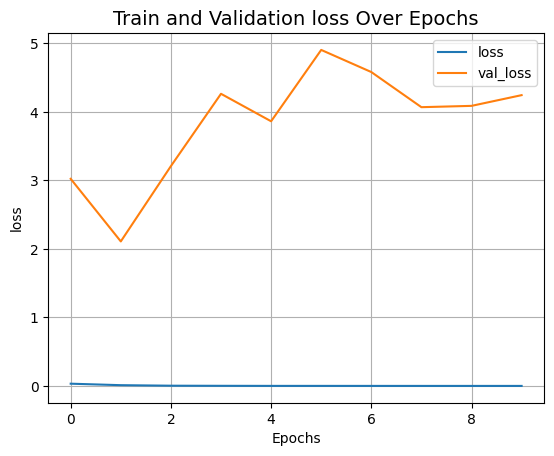

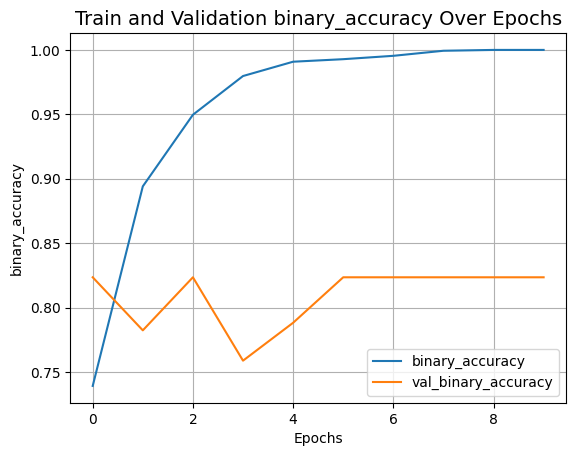

In [75]:
epochs = 10

shallow_mlp_model = make_model()
shallow_mlp_model.compile(
    loss="binary_crossentropy", optimizer="adam", metrics=["binary_accuracy",
    "categorical_accuracy"]
)

class_weight = {label: 1 for label in range(len(vocab))}

counts = {}
for i, row in train_df.iterrows():
    for lab in row["label"]:
        counts.setdefault(lab, 0)
        counts[lab] += 1
for label in counts:
    for i in range(len(vocab)):
        if label == vocab[i]:
            class_weight[i] = 1 / counts[label]

history = shallow_mlp_model.fit(
    train_dataset, validation_data=validation_dataset, epochs=epochs, class_weight=class_weight
)


def plot_result(item):
    plt.plot(history.history[item], label=item)
    plt.plot(history.history["val_" + item], label="val_" + item)
    plt.xlabel("Epochs")
    plt.ylabel(item)
    plt.title("Train and Validation {} Over Epochs".format(item), fontsize=14)
    plt.legend()
    plt.grid()
    plt.show()


plot_result("loss")
plot_result("binary_accuracy")

In [77]:
_, binary_acc, cat_acc = shallow_mlp_model.evaluate(test_dataset)
print(f"Categorical accuracy on the test set: {round(binary_acc * 100, 2)}%.")

7/7 [==============================] - 0s 5ms/step - loss: 2.9212 - binary_accuracy: 0.7929 - categorical_accuracy: 0.5600
Categorical accuracy on the test set: 79.29%.


In [78]:
model_for_inference = keras.Sequential([text_vectorizer, shallow_mlp_model])

# Create a small dataset just for demoing inference.
inference_dataset = make_dataset(test_df, is_train=False)
for text_batch, label_batch in inference_dataset:
    predicted_probabilities = model_for_inference.predict(text_batch)

    # Perform inference.
    for i, text in enumerate(text_batch):
        label = label_batch[i].numpy()[None, ...]
        print(f"Label(s): {invert_multi_hot(label[0])}")
        predicted_proba = [proba for proba in predicted_probabilities[i]]
        labels = sorted(
                zip(predicted_probabilities[i], lookup.get_vocabulary()),
                key=lambda pair: pair[0],
                reverse=True,
            )
        print(f"Predicted Label(s): ({', '.join([label[1] for label in labels if label[0] > 0.5])})")
        print(" ")

1/1 [==============================] - 0s 93ms/step
Label(s): ['(WT) Opinion' '(WTO) Storytelling' '(WTO) Mocking, trolling'
 '(WTO) Oversimplification']
Predicted Label(s): ((WTO) Irrelevant data / uncheckable data, (WT) Opinion)
 
Label(s): ['(WTO) Irrelevant data / uncheckable data' '(WT) Opinion'
 '(WTO) Slogans, myths, stereotypes' '(WTO) Storytelling'
 '(WTO) Shock content' '(WTO) Allegories and metaphors']
Predicted Label(s): ((WTO) Irrelevant data / uncheckable data, (WT) Opinion)
 
Label(s): ['(WTO) Irrelevant data / uncheckable data' '(WT) Opinion'
 '(WTO) Slogans, myths, stereotypes']
Predicted Label(s): ((WTO) Irrelevant data / uncheckable data, (WT) Opinion)
 
Label(s): ['(WT) Opinion' '(WTO) Slogans, myths, stereotypes'
 '(WTO) Emotional "load"' '(WTO) Repetition']
Predicted Label(s): ((WTO) Irrelevant data / uncheckable data, (WT) Opinion)
 
1/1 [==============================] - 0s 20ms/step


2023-05-08 19:11:25.408544: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [25,17]
	 [[{{node Placeholder/_1}}]]


Label(s): ['(WTO) Slogans, myths, stereotypes' '(WTO) Storytelling'
 '(WTO) Promotion' '(WT) Reporting']
Predicted Label(s): ((WTO) Irrelevant data / uncheckable data, (WT) Opinion)
 
Label(s): ['(WT) Reporting']
Predicted Label(s): ((WTO) Irrelevant data / uncheckable data, (WT) Opinion)
 
Label(s): ['(WTO) Irrelevant data / uncheckable data' '(WT) Opinion'
 '(WTO) Slogans, myths, stereotypes' '(WTO) Emotional "load"'
 '(WTO) Storytelling' '(WTO) Promotion' '(WTO) Shock content'
 '(WTO) Extremums']
Predicted Label(s): ((WTO) Irrelevant data / uncheckable data, (WT) Opinion)
 
Label(s): ['(WTO) Irrelevant data / uncheckable data' '(WT) Opinion'
 '(WTO) Slogans, myths, stereotypes' '(WTO) Obfuscation'
 '(WTO) Repetition']
Predicted Label(s): ((WTO) Irrelevant data / uncheckable data, (WT) Opinion)
 
1/1 [==============================] - 0s 25ms/step
Label(s): ['(WT) Opinion' '(WTO) Slogans, myths, stereotypes' '(WTO) Promotion'
 '(WTO) Shock content']
Predicted Label(s): ((WT) Opinion,